Results from Level IW algorithm (for boxplot and accuracy timelime).
One Class Diagonal Translation. 2 Dimensional data.
100 batches of 152 instances



METHOD: Static nb as classifier
Execution time:  0.05545448547692106
Average MCC:  0.980593665312
Average macro-F1: 0.9901072451214517
Average Accuracy:  99.0319
Standard Deviation:  0.791335194466
Variance:  0.62621139


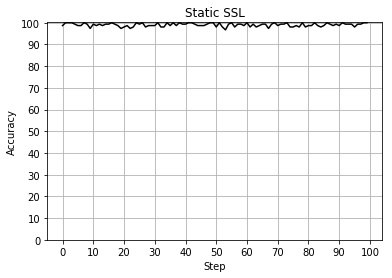

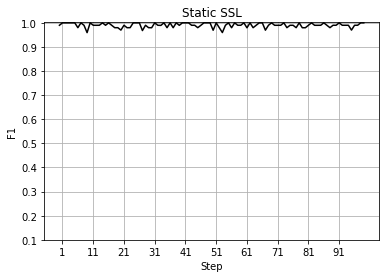




METHOD: Sliding nb as classifier
Execution time:  0.12012419175212852
Average MCC:  0.999801488784
Average macro-F1: 0.9998997493734336
Average Accuracy:  99.9736
Standard Deviation:  0.159496206851
Variance:  0.02543904


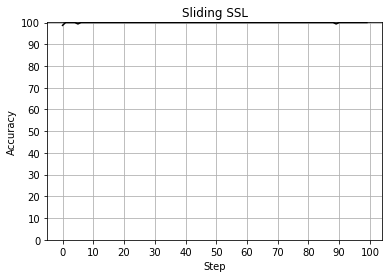

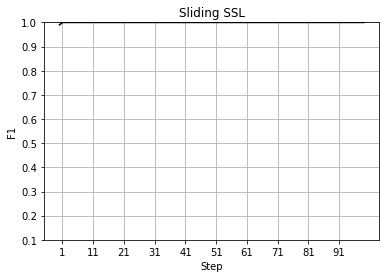




METHOD: Incremental nb as classifier
Execution time:  0.3437420370275994
Average MCC:  0.99566627475
Average macro-F1: 0.9977899403086259
Average Accuracy:  99.7562
Standard Deviation:  0.718759737325
Variance:  0.51661556


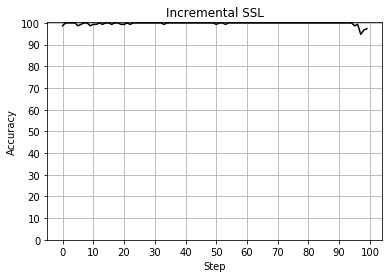

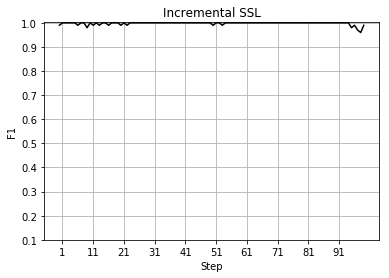




METHOD: nb as classifier and kde as core support extraction with cutting data method
Execution time:  0.7872925874084986
Average MCC:  0.999007922444
Average macro-F1: 0.9994969856817747
Average Accuracy:  99.9538
Standard Deviation:  0.192534568325
Variance:  0.03706956


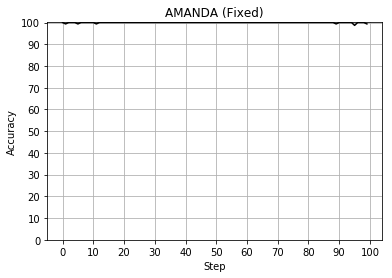

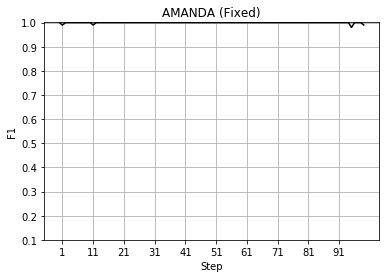




METHOD: nb as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  11.917128198077865
Average MCC:  0.999605366005
Average macro-F1: 0.9997987117552336
Average Accuracy:  99.9472
Standard Deviation:  0.201921172738
Variance:  0.04077216


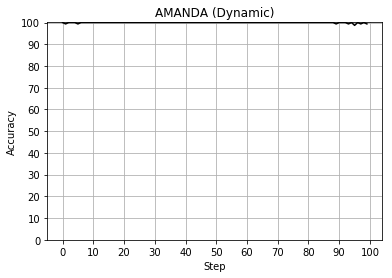

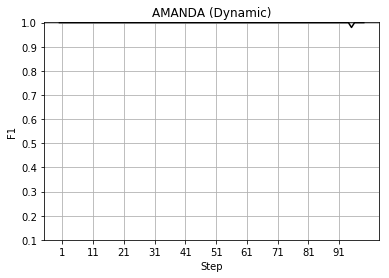




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  27.881386921149932
Average MCC:  0.99921073201
Average macro-F1: 0.999597423510467
Average Accuracy:  99.9144
Standard Deviation:  0.343811925331
Variance:  0.11820664


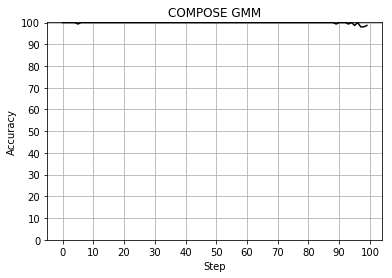

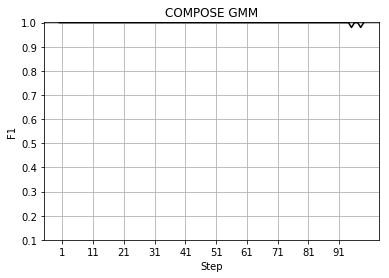




Method: Level IW
Execution time:  27.881386921149932
Average MCC:  -0.000156268648432


C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Average F1:  0.166119292586
Average Accuracy:  99.967105
Standard Deviation:  0.170927433945
Variance:  0.029216187675


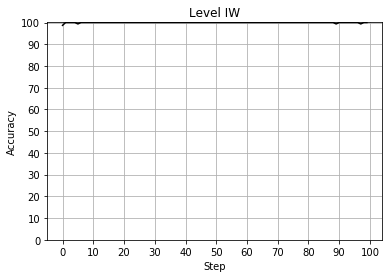

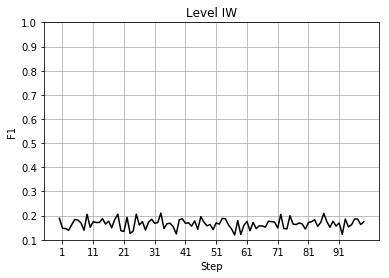

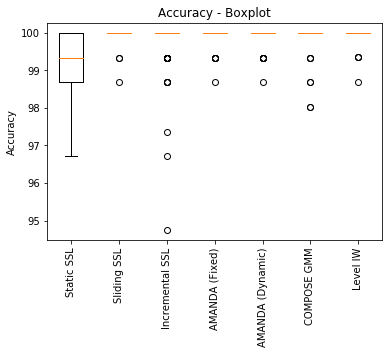

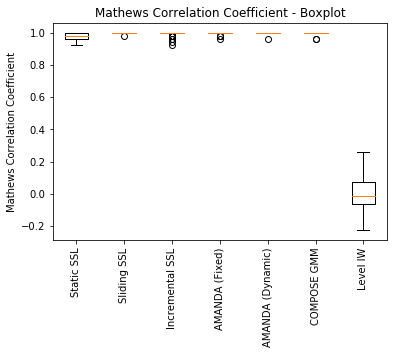

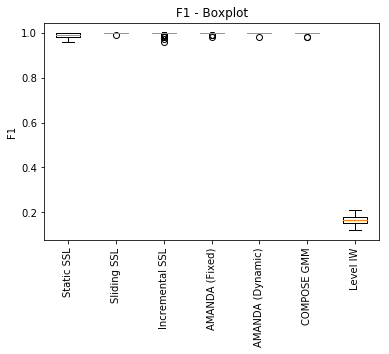

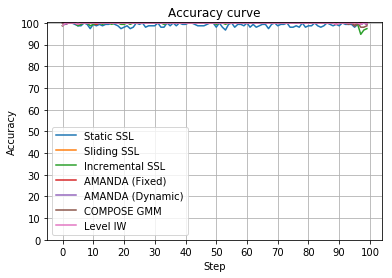

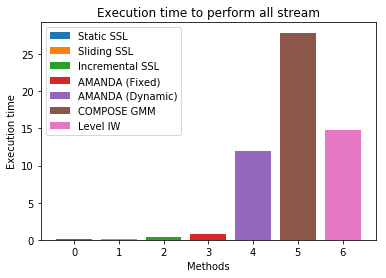

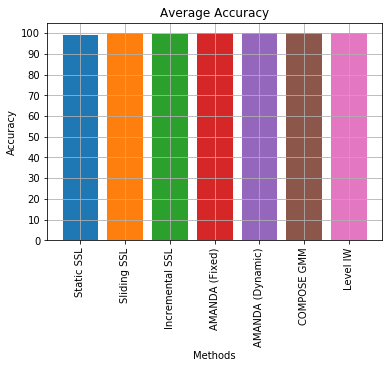

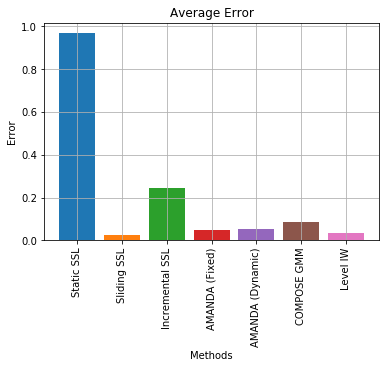

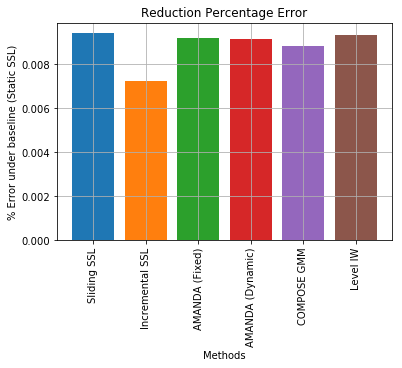

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version
#from methods import lstm


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'nb' # lp = label propagation, rf = random forests, nb = naive bayes, knn = k-nn, sgd = stochastic gradient descent
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadCDT(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))
    #'''
    # Static SSL
    experiments[0] = Experiment(static_classifier, 2, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 2, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 2, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 2, 0.9, "kde", clfName=sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 2, None, "kde", clfName=sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 2)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '1CDT', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    #'''
    # Upper-bound
    #experiments[6] = Experiment(lstm, 2)
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()